##如何加载图片

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
path = r"/content/drive/MyDrive/MTB/MTB/Tuberculosis/Tuberculosis-1.png"
img = Image.open(path)
plt.imshow(img)

In [ ]:
import os
image_files = "/content/drive/MyDrive/MTB/MTB/Tuberculosis"
image_name = "Tuberculosis-1.png"

img_path = os.path.join(image_files,image_name)

print(img_path)
plt.imshow(Image.open(img_path))

In [ ]:
import os
image_files = "/content/drive/MyDrive/MTB/MTB/Tuberculosis"
imgdir = os.listdir("/content/drive/MyDrive/MTB/MTB/Tuberculosis")
print(imgdir)

In [ ]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

# 获取所有图片的文件路径
image_files = glob.glob("/content/drive/MyDrive/MTB/MTB/Tuberculosis/*.png")

# 定义子图的行数和列数
num_rows = 2
num_cols = 2

# 创建子图并显示多个图片
fig, axs = plt.subplots(num_rows, num_cols)

# 遍历图片文件路径并显示对应的图像
for i, ax in enumerate(axs.flat):
    # 检查是否还有剩余的图片需要显示
    if i < len(image_files):
        img = Image.open(image_files[i])
        ax.imshow(img)
        ax.axis('off')  # 隐藏坐标轴
    else:
        # 如果图片数量不足以填满所有子图，则隐藏该子图
        ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

## 写一个自己的数据集类

In [27]:
import os
from PIL import Image
class MyDataset:
  def __init__(self, root_dir, label_dir):
    self.root_dir = root_dir
    self.label_dir = label_dir
    self.path = os.path.join(self.root_dir, self.label_dir)
    self.img_path = os.listdir(self.path)

  def __getitem__(self, idx):
    img_name = self.img_path[idx]
    img_item_path = os.path.join(self.path, img_name)
    img = Image.open(img_item_path)
    label = self.label_dir
    return img, label
  def __len__(self):
    return len(self.img_path)

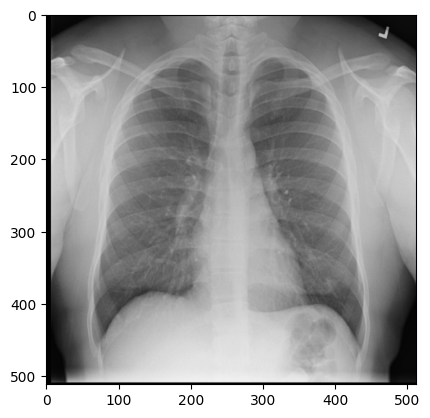

In [33]:
root_dir = "/content/drive/MyDrive/MTB/MTB"
label1_dir = "Normal"
label2_dir = "Tuberculosis"

Normal_data = MyDataset(root_dir, label1_dir)
Tuberculosis_data = MyDataset(root_dir, label2_dir)
img, label = Normal_data[1]
plt.imshow(img)

In [39]:
from torch.utils.data import ConcatDataset

# 合并两个数据集
All_data = ConcatDataset([Normal_data, Tuberculosis_data])
len(All_data), len(Normal_data), len(Tuberculosis_data)

(1600, 900, 700)